# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

___

## Initialization

In [16]:
# Loading all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import seaborn as sns



### Load data

In [17]:
# Load the data file into a DataFrame
data = pd.read_csv("C:/Users/mrkil/Desktop/Data Analyst/vehicles_us.csv")


### Explore initial data

In [18]:
# print the general/summary information about the DataFrame
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB
None


In [19]:
# print a sample of data
display(data.head())


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


Are there any issues that may need further investigation and changes?

**Columns with inappropriate data types**



Are there columns with inappropriate data types?

**Dtype is wrong in model_year, cylinders, odometer, is_4wd, date_posted.**


Are there missing values across all columns or just a few? What columns contain the most missing values?

**Columns with missing values**

**There are missing values in model_year, cylinders, odometer, paint_color, is_4wd columns. <br>
Column is_4wd has the most missing values, followed by paint_color and odometer.**

### Conclusions and further steps


**The data frame needs to be cleaned of duplicates, missing values ought to be filled appropriately, data types are to be fixed.**

## Treating missing values 

Studying missing values for each column in more details

In [20]:
# Missing values number
print(data.isna().sum())

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


In [21]:
#Missing values percentage
data.isna().mean()*100

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

In [22]:
#Missing values percentage
pd.DataFrame(data.isna().mean()*100).sort_values(by=0)[::-1].style.background_gradient('coolwarm')

,0
is_4wd,50.369723
paint_color,17.985444
odometer,15.316836
cylinders,10.208637
model_year,7.023775
days_listed,0.000000
date_posted,0.000000
type,0.000000
transmission,0.000000
fuel,0.000000


### Working with missing values

model_year - Every model has its own “most common” year, so the missing values for each model should be restored according to this model’s most common year
cylinders - fill in with the most common value for a certain model and model year<br>
odometer - fill NaN with estimated average year mileage multiplied by delta between year posted and model year <br>
paint color - fill NaN with 'unknown', since car colors are completely random, so it it impossib;e to restore these values.<br>
is_4wd - It is a Boolean field that contains only True values. It's reasonable to assume that the missing values are False.

In [23]:
#filling missimng values in model_year column with the most common model year value by model
data['model_year'] = data.groupby(['model'])['model_year'].transform(lambda grp: grp.fillna(grp.mode().max()))



In [24]:
display(data['model_year'].isna().sum())

0

In [25]:
#filling missimng values in cylinders column with the most common model year value by model

data['cylinders'] = data.groupby(['model', 'model_year'])['cylinders'].transform(lambda grp: grp.fillna(grp.mode().max()))



In [26]:
data['cylinders'].isna().sum()

26

Not all model groups have missing modes(), the grouping that was formed for them consisted only of missing values, so it was nothing to replace them with. 
We can simply replace them with mode() 

In [46]:

data['cylinders']= data['cylinders'].fillna(data.groupby('model')['cylinders'].transform(lambda grp: grp.fillna(grp.mode().max())))


In [47]:
data['cylinders'].isna().sum()

0

To fill in model_year column we first need to establish a year it was posted as a datetime format value


In [48]:
data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d')

Next step is to add this column to the dataframe

In [ ]:
data['year_posted'] = data['date_posted'].dt.year

In [49]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,2018
1,25500,2013.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2018
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,2019
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,2019
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,2019


Filling missing values in odometer column with estimated average year mileage multiplied by delta between year posted and model year

In [50]:
data['odometer'] = data['odometer'].fillna((data['year_posted']-data['model_year'])*15000)


Replacing odometer 0 values with 1 to avoid dividing by 0 in future calculations

In [51]:
data['odometer'] = data['odometer'].replace(0,1)

Since is_4wd column is a Boolean, it is reasonable to suggest that if 1.0 means the car is 4wd, than the rest have not


In [52]:
data['is_4wd'] = data['is_4wd'].fillna(0) 

In [53]:
data['is_4wd'].isna().sum()

0

Color is a completely random attribute, so it is impossible to restore missing values


In [54]:
data['paint_color'] = data['paint_color'].fillna('unknown')

In [55]:
data['paint_color'].isna().sum()

0

In [56]:
#All missing values have been accounted for
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  year_posted   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(6)
memory usage: 5.5+ MB


**By the end of this section all of the missing values have been identified and filled.**

## Fix data types

As the data is more or less complete now, time to fix the data types

In [57]:
#Fixing data types in model_year, cylinders, odometer, is_4wd columns.
data['model_year'] = data['model_year'].astype('int')
data['cylinders'] = data['cylinders'].astype('int')
data['odometer'] = data['odometer'].astype('int')
data['is_4wd'] = data['is_4wd'].astype('int')

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  int64         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  year_posted   51525 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(6)
memory usage: 5.5+ MB


In [59]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,2018
1,25500,2013,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,2018
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,2019
3,1500,2003,ford f-150,fair,8,gas,240000,automatic,pickup,unknown,0,2019-03-22,9,2019
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,2019


## Enrich data

Adding additional factors to the data to make the analysis easier.

In [60]:
# Add datetime values for when the ad was placed
data['month_posted'] = data['date_posted'].dt.month
data['weekday_posted'] = data['date_posted'].dt.weekday
#year_posted has been added earlier

In [61]:
# Add the vehicle's age when the ad was placed
data['vehicle_age'] = data['year_posted']-data['model_year']


In [62]:
#getting rid of 0 in vehicle_age column, because it is impossible to divide by it
data['vehicle_age'] = data['vehicle_age'].replace(0,1)

In [63]:
# Add the vehicle's average mileage per year
data['avg_mileage_year'] = (data['odometer']/data['vehicle_age']).round(0)



In [64]:
data['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [65]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,weekday_posted,vehicle_age,avg_mileage_year
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,2018,6,5,7,20714.0
1,25500,2013,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,2018,10,4,5,17741.0
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,2019,2,3,6,18333.0
3,1500,2003,ford f-150,fair,8,gas,240000,automatic,pickup,unknown,0,2019-03-22,9,2019,3,4,16,15000.0
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,2019,4,1,2,40452.0


It might help to replace the condition values with something that can be manipulated more easily


In [27]:
#Let's create a dictionary 
condition_dict = {'new':5, 'like new': 4, 'excellent': 3, 'good': 2, 'fair': 1, 'salvage':0}

data['condition_class'] = data['condition'].apply(lambda x: condition_dict[x])

In [67]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,weekday_posted,vehicle_age,avg_mileage_year,condition_class
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,2018,6,5,7,20714.0,2
1,25500,2013,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,2018,10,4,5,17741.0,2
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,2019,2,3,6,18333.0,4
3,1500,2003,ford f-150,fair,8,gas,240000,automatic,pickup,unknown,0,2019-03-22,9,2019,3,4,16,15000.0,1
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,2019,4,1,2,40452.0,3


## Check clean data

Given the data is ready for the analysis, let's take just another quick look at it. It is helpful to see what exactly is going to be used for the analysis.

In [68]:
# print the general/summary information about the DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51525 non-null  int64         
 1   model_year        51525 non-null  int64         
 2   model             51525 non-null  object        
 3   condition         51525 non-null  object        
 4   cylinders         51525 non-null  int64         
 5   fuel              51525 non-null  object        
 6   odometer          51525 non-null  int64         
 7   transmission      51525 non-null  object        
 8   type              51525 non-null  object        
 9   paint_color       51525 non-null  object        
 10  is_4wd            51525 non-null  int64         
 11  date_posted       51525 non-null  datetime64[ns]
 12  days_listed       51525 non-null  int64         
 13  year_posted       51525 non-null  int64         
 14  month_posted      5152

In [69]:
# print a sample of data

data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,weekday_posted,vehicle_age,avg_mileage_year,condition_class
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,2018,6,5,7,20714.0,2
1,25500,2013,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,2018,10,4,5,17741.0,2
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,2019,2,3,6,18333.0,4
3,1500,2003,ford f-150,fair,8,gas,240000,automatic,pickup,unknown,0,2019-03-22,9,2019,3,4,16,15000.0,1
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,2019,4,1,2,40452.0,3


## Study core parameters

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

Text(0, 0.5, 'number of cars')

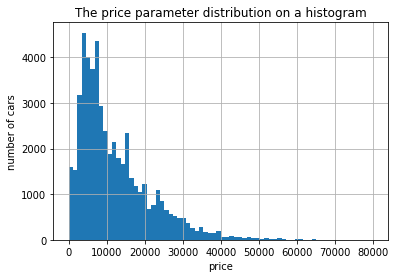

In [70]:
#Studying price parameter 
data.hist('price', bins = 70, range=(0,80000))
plt.title('The price parameter distribution on a histogram')
plt.xlabel('price')
plt.ylabel('number of cars')


In [71]:
#Checking, if the distribution is skewed to the right
data['price'].mean()>data['price'].median()

True

In [72]:
def distribution_percentile (parameter):
    print(f"The histogram of: {parameter}")
    data[parameter].hist()
    plt.show()
    if data[parameter].mean() > data[parameter].median():
        print( f"The distribution of {parameter} is skewed to the right")
    else:
        print(f"The distribution of {parameter} is skewed to the left")
    print('Statistics on: {}'.format(parameter))
    print(data[parameter].describe())
    ninety_eight = np.percentile(data[parameter], 98)
    two = np.percentile(data[parameter], 2)
    print('---------------------------------------')
    print('min border:',two)
    print('max border:',ninety_eight)
    print('---------------------------------------')
    print('The outliers are considered to be values below',two, "and above",ninety_eight)
    print('We have',len(data[(data[parameter]<two)|(data[parameter]>ninety_eight)]),"values that we can consider outliers")

**automated output of all parameters analyses via iteration**

The histogram of: price


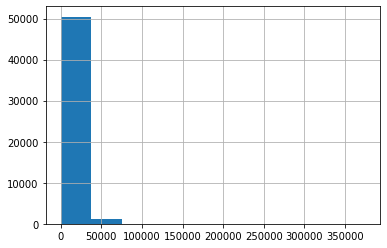

The distribution of price is skewed to the right
Statistics on: price
count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64
---------------------------------------
min border: 371.48
max border: 37995.0
---------------------------------------
The outliers are considered to be values below 371.48 and above 37995.0
We have 2059 values that we can consider outliers
The histogram of: vehicle_age


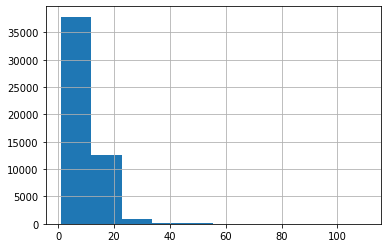

The distribution of vehicle_age is skewed to the right
Statistics on: vehicle_age
count    51525.000000
mean         8.475808
std          6.103866
min          1.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: vehicle_age, dtype: float64
---------------------------------------
min border: 1.0
max border: 23.0
---------------------------------------
The outliers are considered to be values below 1.0 and above 23.0
We have 887 values that we can consider outliers
The histogram of: avg_mileage_year


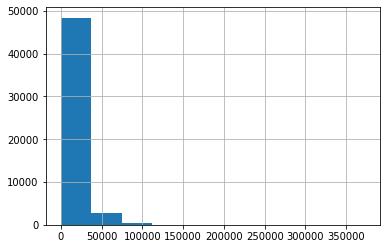

The distribution of avg_mileage_year is skewed to the right
Statistics on: avg_mileage_year
count     51525.000000
mean      17725.987656
std       13090.324081
min           0.000000
25%       11273.000000
50%       15000.000000
75%       20250.000000
max      373200.000000
Name: avg_mileage_year, dtype: float64
---------------------------------------
min border: 21.0
max border: 55000.0
---------------------------------------
The outliers are considered to be values below 21.0 and above 55000.0
We have 2037 values that we can consider outliers
The histogram of: cylinders


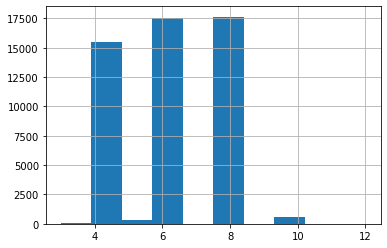

The distribution of cylinders is skewed to the right
Statistics on: cylinders
count    51525.000000
mean         6.121921
std          1.657815
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64
---------------------------------------
min border: 4.0
max border: 8.0
---------------------------------------
The outliers are considered to be values below 4.0 and above 8.0
We have 613 values that we can consider outliers
The histogram of: condition_class


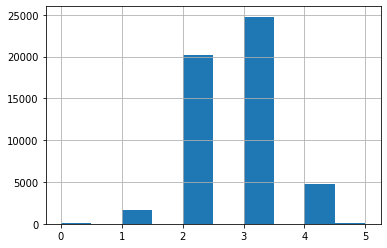

The distribution of condition_class is skewed to the left
Statistics on: condition_class
count    51525.000000
mean         2.637535
std          0.712447
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition_class, dtype: float64
---------------------------------------
min border: 1.0
max border: 4.0
---------------------------------------
The outliers are considered to be values below 1.0 and above 4.0
We have 258 values that we can consider outliers


In [73]:
for parameter in ['price', 'vehicle_age', 'avg_mileage_year', 'cylinders', 'condition_class']:
    distribution_percentile(parameter)

The histogram of: price


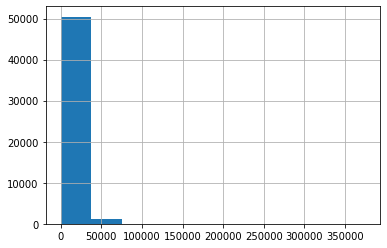

The distribution of price is skewed to the right
Statistics on: price
count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64
---------------------------------------
min border: 371.48
max border: 37995.0
---------------------------------------
The outliers are considered to be values below 371.48 and above 37995.0
We have 2059 values that we can consider outliers


In [74]:
distribution_percentile('price')

The histogram of: vehicle_age


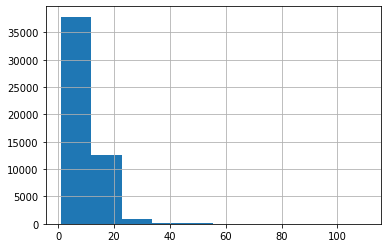

The distribution of vehicle_age is skewed to the right
Statistics on: vehicle_age
count    51525.000000
mean         8.475808
std          6.103866
min          1.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: vehicle_age, dtype: float64
---------------------------------------
min border: 1.0
max border: 23.0
---------------------------------------
The outliers are considered to be values below 1.0 and above 23.0
We have 887 values that we can consider outliers


In [75]:
#Studying vehicle's age parameter 
distribution_percentile('vehicle_age')



The histogram of: avg_mileage_year


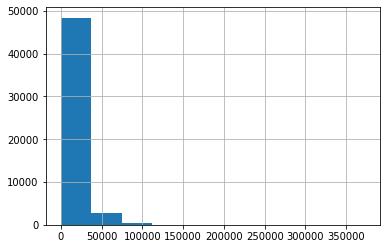

The distribution of avg_mileage_year is skewed to the right
Statistics on: avg_mileage_year
count     51525.000000
mean      17725.987656
std       13090.324081
min           0.000000
25%       11273.000000
50%       15000.000000
75%       20250.000000
max      373200.000000
Name: avg_mileage_year, dtype: float64
---------------------------------------
min border: 21.0
max border: 55000.0
---------------------------------------
The outliers are considered to be values below 21.0 and above 55000.0
We have 2037 values that we can consider outliers


In [76]:
# Studying mileage parameter 
distribution_percentile ('avg_mileage_year')



The histogram of: cylinders


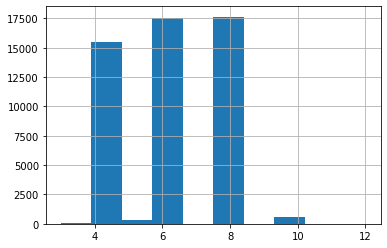

The distribution of cylinders is skewed to the right
Statistics on: cylinders
count    51525.000000
mean         6.121921
std          1.657815
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64
---------------------------------------
min border: 4.0
max border: 8.0
---------------------------------------
The outliers are considered to be values below 4.0 and above 8.0
We have 613 values that we can consider outliers


In [77]:
# Studying number of cylinders parameter 
distribution_percentile ('cylinders')



The histogram of: condition_class


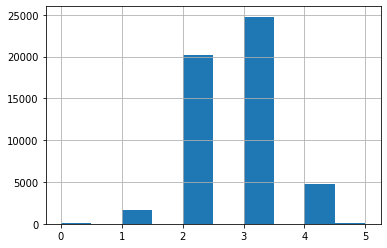

The distribution of condition_class is skewed to the left
Statistics on: condition_class
count    51525.000000
mean         2.637535
std          0.712447
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition_class, dtype: float64
---------------------------------------
min border: 1.0
max border: 4.0
---------------------------------------
The outliers are considered to be values below 1.0 and above 4.0
We have 258 values that we can consider outliers


In [78]:
# Studying condition parameter 
distribution_percentile ('condition_class')



**The datandicates, that cars usually cost around 9000, are 7 years old and have a mileage of 15000. In addition, cars normally have 6 cylinders and are of excellent condition.**

## Study and treat outliers

Given the results above, determine what columns may contain outliers, and create a DataFrame without those outliers. 

Outliers can be identified by defining the lower/upper limits for normal range of values.

In [79]:
# Determine the limits for outliers
border_list=[]
for parameter in ['price', 'vehicle_age', 'avg_mileage_year', 'cylinders', 'condition_class']:
    two = np.percentile(data[parameter], 2)
    ninety_eight = np.percentile(data[parameter], 98)
    border_list.append([parameter,two,ninety_eight])


In [80]:
print(border_list)

[['price', 371.48, 37995.0], ['vehicle_age', 1.0, 23.0], ['avg_mileage_year', 21.0, 55000.0], ['cylinders', 4.0, 8.0], ['condition_class', 1.0, 4.0]]


In [81]:
border_df = pd.DataFrame(border_list)
border_df.columns = (['columns', 'lower_limit','upper_limit'])
border_df

,columns,lower_limit,upper_limit
0,price,371.48,37995.0
1,vehicle_age,1.00,23.0
2,avg_mileage_year,21.00,55000.0
3,cylinders,4.00,8.0
4,condition_class,1.00,4.0


In [82]:
# Store data without outliers in a separate DataFrame
good_data = data.query('(371.48 <= price <= 37995) and (1.0<= vehicle_age <= 23.0) and (21.00 <=avg_mileage_year<= 55000.0)') 

display(good_data)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,weekday_posted,vehicle_age,avg_mileage_year,condition_class
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,2018,6,5,7,20714.0,2
1,25500,2013,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,2018,10,4,5,17741.0,2
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,2019,2,3,6,18333.0,4
3,1500,2003,ford f-150,fair,8,gas,240000,automatic,pickup,unknown,0,2019-03-22,9,2019,3,4,16,15000.0,1
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,2019,4,1,2,40452.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136,automatic,sedan,black,0,2018-10-03,37,2018,10,2,5,17627.0,4
51521,2700,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,0,2018-11-14,22,2018,11,2,16,11344.0,0
51522,3950,2009,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,0,2018-11-15,32,2018,11,3,9,14222.0,3
51523,7455,2013,toyota corolla,good,4,gas,139573,automatic,sedan,black,0,2018-07-02,71,2018,7,0,5,27915.0,2


In [83]:
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46843 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             46843 non-null  int64         
 1   model_year        46843 non-null  int64         
 2   model             46843 non-null  object        
 3   condition         46843 non-null  object        
 4   cylinders         46843 non-null  int64         
 5   fuel              46843 non-null  object        
 6   odometer          46843 non-null  int64         
 7   transmission      46843 non-null  object        
 8   type              46843 non-null  object        
 9   paint_color       46843 non-null  object        
 10  is_4wd            46843 non-null  int64         
 11  date_posted       46843 non-null  datetime64[ns]
 12  days_listed       46843 non-null  int64         
 13  year_posted       46843 non-null  int64         
 14  month_posted      4684

In [84]:
good_data['vehicle_age'].describe()

count    46843.000000
mean         8.402045
std          4.973924
min          1.000000
25%          4.000000
50%          8.000000
75%         12.000000
max         23.000000
Name: vehicle_age, dtype: float64

In [85]:
print(len(good_data))

good_data[['price', 'vehicle_age', 'odometer', 'cylinders', 'condition_class']].describe().loc[['min', 'max']]

46843


,price,vehicle_age,odometer,cylinders,condition_class
min,372.0,1.0,21.0,3.0,0.0
max,37995.0,23.0,920000.0,12.0,5.0


## Study core parameters without outliers

Using the filtered data to make new plots and comparing with the earlier ones (that included outliers).

Text(0, 0.5, 'Vehicle numbers')

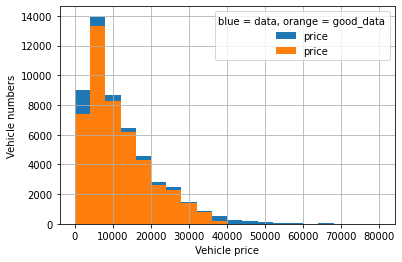

In [86]:
#The filtered and unfiltered data on price column
data['price'].hist(bins=20, range=(0,80000),legend= True)
good_data['price'].hist(bins=20, range=(0,80000),legend= True)
plt.legend(title='blue = data, orange = good_data')
plt.xlabel("Vehicle price")
plt.ylabel("Vehicle numbers")

Text(0, 0.5, 'Vehicle numbers')

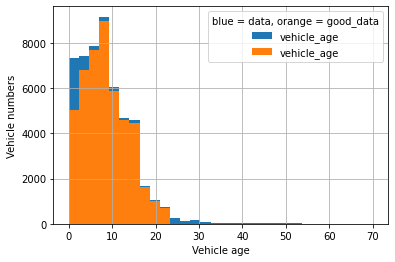

In [87]:
data['vehicle_age'].hist(bins=30, range=(0,70),legend= True)
good_data['vehicle_age'].hist(bins=30, range=(0,70),legend= True)
plt.legend(title='blue = data, orange = good_data')
plt.xlabel("Vehicle age")
plt.ylabel("Vehicle numbers")

Text(0, 0.5, 'Vehicle numbers')

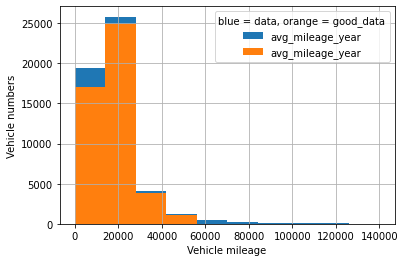

In [88]:
data['avg_mileage_year'].hist(bins=10, range=(0,140000),legend= True)
good_data['avg_mileage_year'].hist(bins=10, range=(0,140000),legend= True)
plt.legend(title='blue = data, orange = good_data')
plt.xlabel("Vehicle mileage")
plt.ylabel("Vehicle numbers")

**The data has been cleaned from outliers and that is what has been displayed by the implementation of graphs.
One can observe, that the most outliers happened to be in the vehicle_age parameter, that can mean, that there awerere a lot of very old vehicles.**

## Ads lifetime

Let's study how many days advertisements were displayed (`days_listed`) and calculate the mean and median. Then describe the typical lifetime of an ad. Finally, determine when ads were removed quickly, and when they were listed for an abnormally long time.

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

4.0

115.0

<AxesSubplot:>

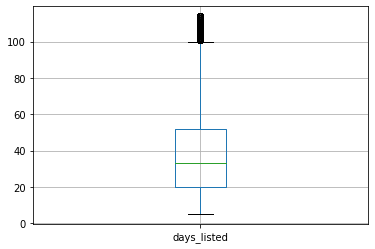

In [89]:
display(data['days_listed'].describe()) #number of ads displayed, with mean and median.
display(np.percentile(data.days_listed, 2))
display(np.percentile(data.days_listed, 98))

days_listed_filtered = data.query('4<days_listed<115')
display(days_listed_filtered.boxplot('days_listed'))

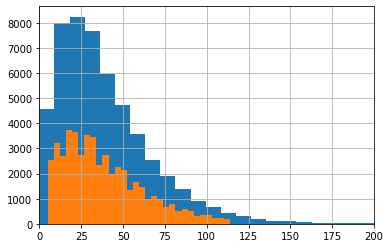

In [90]:
data['days_listed'].hist(bins=30)
days_listed_filtered['days_listed'].hist(bins=30)
plt.xlim(0,200)
plt.show()

In [91]:
data['days_listed'].mean()>data['days_listed'].median()

True

Now, according to the histogram and statistics, we can conclude that almost all cars are sold within 150 days. 1st quartile (or 25th percentile) is 19 days. So, we can say that 15 is very fast. 3rd quartile (or 75th percentile) is 53 days. Then let's say that very long is more than 100 days. More than 150 days is abnormally long and need to be removed as outliers.


## Average price per each type of vehicle

In this section we analyze the number of ads and the average price for each type of vehicle. 
- Plot a graph showing the dependence of the number of ads on the vehicle type. 
- Select the two types with the greatest number of ads.

In [92]:
#The number of ads and the average price for each type of vehicle

avg_price_per_type = good_data.groupby(['type'])['price'].agg(['count','mean']).reset_index().sort_values(by= 'count',ascending=False)
avg_price_per_type

,type,count,mean
0,SUV,11443,10826.692039
9,sedan,11359,7022.199049
10,truck,10904,15752.478357
8,pickup,6332,15235.168825
3,coupe,1926,14165.988058
12,wagon,1467,8980.507157
5,mini-van,1111,7934.415842
4,hatchback,957,6818.244514
11,van,589,10840.441426
2,convertible,329,13476.820669


In [93]:
avg_price_per_type_top = avg_price_per_type.nlargest(2, 'count')
avg_price_per_type_top

,type,count,mean
0,SUV,11443,10826.692039
9,sedan,11359,7022.199049


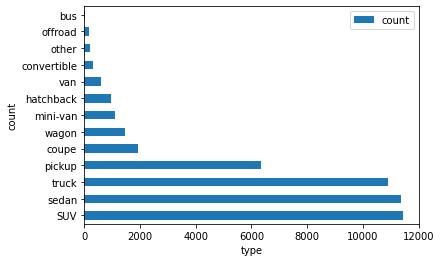

In [94]:
#graph showing the dependence of the number of ads on the vehicle type
avg_price_per_type.plot.barh(x='type', y='count')
plt.ylabel('count')
plt.xlabel('type')
plt.show()

## Price factors

What factors impact the price most? 


First, we need to take each of the popular types detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. 


For categorical variables (transmission type and color), box-and-whisker charts will be plotted, and scatterplots for the rest. 

In [95]:
#Selecting the two most popular types of vehicles from the dataset and saving them as variables
SUV = good_data[good_data['type']== 'SUV']
Sedan = good_data[good_data['type']== 'sedan']

In [96]:
#Selecting the necessary variables for furher scatterplot analysis.
for_scatter_SUV = SUV[['price', 'vehicle_age', 'odometer', 'condition_class']]
display(for_scatter_SUV)

for_scatter_Sedan = Sedan[['price', 'vehicle_age', 'odometer', 'condition_class']]
display(for_scatter_Sedan)

,price,vehicle_age,odometer,condition_class
0,9400,7,145000,2
7,15990,6,109473,3
8,11500,6,104174,3
9,9200,11,147191,3
14,12990,10,132285,3
...,...,...,...,...
51495,9500,7,144500,2
51496,4999,16,177901,3
51500,6995,6,157000,3
51502,7995,8,111088,4


,price,vehicle_age,odometer,condition_class
2,5500,6,110000,4
4,14900,2,80903,3
5,14990,4,57954,3
6,12990,3,79212,3
11,8990,7,111142,3
...,...,...,...,...
51520,9249,5,88136,4
51521,2700,16,181500,0
51522,3950,9,128000,3
51523,7455,5,139573,2


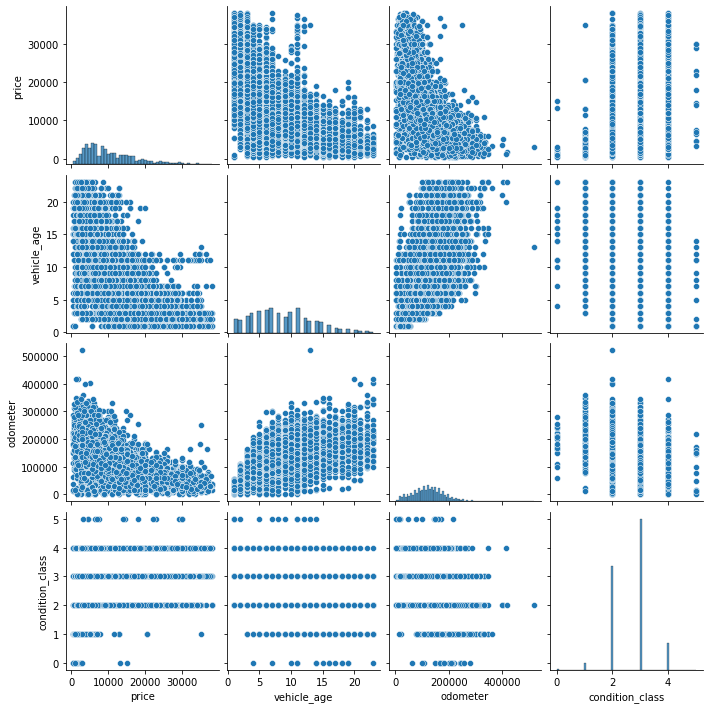

In [97]:
#Plotting a scatter matrix
sns.pairplot(for_scatter_SUV)

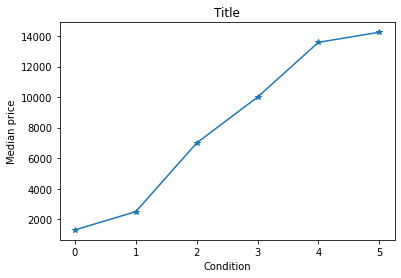

In [98]:
# Reviwer's code

SUV.groupby('condition_class')['price'].median().plot(marker='*')

plt.title('Title')
plt.xlabel('Condition')
plt.ylabel('Median price')

plt.show()

In [99]:

for_scatter_SUV.corr()

,price,vehicle_age,odometer,condition_class
price,1.000000,-0.642020,-0.636811,0.297328
vehicle_age,-0.642020,1.000000,0.709022,-0.307145
odometer,-0.636811,0.709022,1.000000,-0.335051
condition_class,0.297328,-0.307145,-0.335051,1.000000


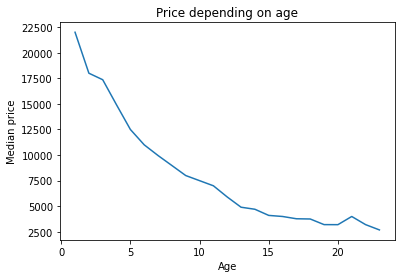

In [100]:

SUV.groupby('vehicle_age')['price'].median().plot(title='Price depending on age', xlabel='Age', ylabel='Median price')

plt.show()

**The scatterplot matrix and Pearson correlation coefficient indicate, that there is a relatively strong negative correlation between  vehicle age/odometer and price for SUVs. Conversely, when it comes to condition, the data demonstrate a positive correlation with price, although not a very strong one.**

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment  ❌</b>
    

What about the condition?
</div>

In [101]:
#Making sure that paint_color variable containts more than 50 ads
SUV_paint_50 = SUV.groupby('paint_color').filter(lambda x: len(x) >50)
SUV_paint_50['paint_color'].value_counts()


unknown    2049
black      1992
white      1805
silver     1475
grey       1102
blue        965
red         855
green       406
brown       359
custom      276
orange       77
Name: paint_color, dtype: int64

In [102]:

SUV_paint_50.groupby('paint_color')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
paint_color,,,,,,,,
black,1992.0,12608.555723,7841.264063,399.0,6250.00,11499.5,16800.00,37995.0
blue,965.0,8605.716062,5846.120999,372.0,4500.00,6995.0,10995.00,34988.0
brown,359.0,8616.114206,5970.089589,500.0,3995.00,7300.0,11995.00,34988.0
custom,276.0,10038.692029,6330.377089,800.0,5650.00,8597.5,12990.00,35000.0
green,406.0,8217.514778,5633.839036,495.0,3608.75,6000.0,11999.75,25950.0
grey,1102.0,10645.163339,7308.540742,500.0,5000.00,8595.0,14206.00,36700.0
orange,77.0,15688.454545,6925.194954,900.0,10995.00,16900.0,18555.00,36000.0
red,855.0,9960.657310,6943.403375,450.0,4650.00,7988.0,13990.00,37499.0
silver,1475.0,10105.143729,6443.640421,483.0,5200.00,8450.0,13925.00,36988.0


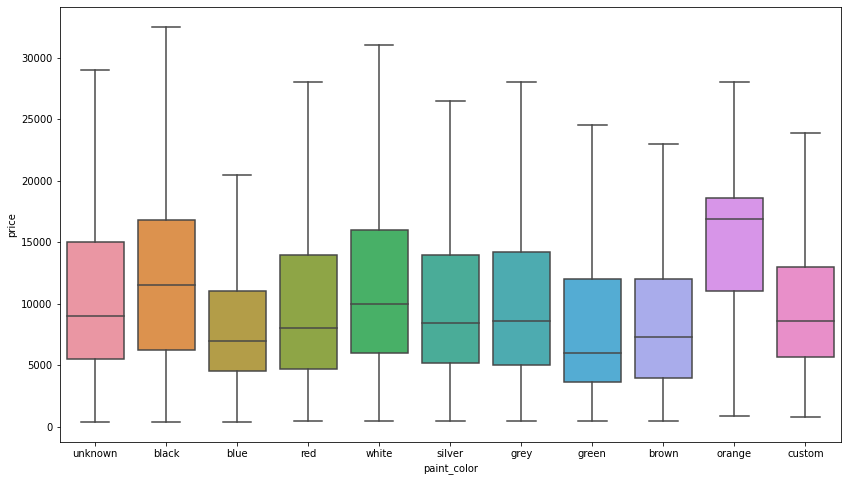

In [103]:
#Plotting a boxplot with the paint_color variable
plt.figure(figsize=(14,8))
ax=sns.boxplot(x="paint_color", y="price", data=SUV_paint_50,showfliers = False)

**We can imply from the boxplot above, that orange SUVs are among the most expensive, probably because of the rarity of the color.**

In [104]:
#Making sure that SUV transmission variable containts more than 50 ads
SUV_transmission = SUV['transmission'].value_counts()
SUV_transmission

automatic    10896
manual         457
other           90
Name: transmission, dtype: int64

In [105]:
SUV.groupby('transmission')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
transmission,,,,,,,,
automatic,10896.0,10770.141520,7331.744988,372.0,5236.0,8900.0,14800.0,37995.0
manual,457.0,11806.571116,6744.029878,500.0,6500.0,11000.0,16500.0,36000.0
other,90.0,12697.466667,5874.972226,2000.0,7995.0,12900.0,17212.5,28999.0


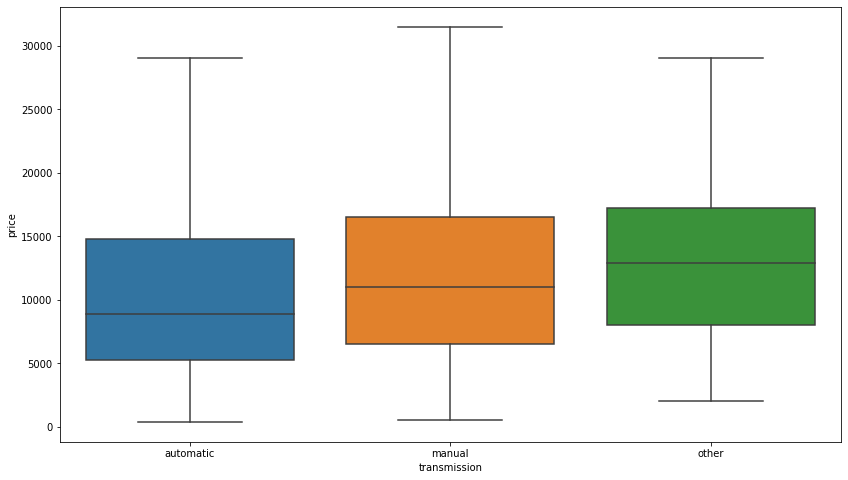

In [106]:
plt.figure(figsize=(14,8))
ax=sns.boxplot(x="transmission", y="price", data=SUV, showfliers = False)

**We can find out from boxplot, that the manual transmission tends to cost more as far as SUV type is concerned.**

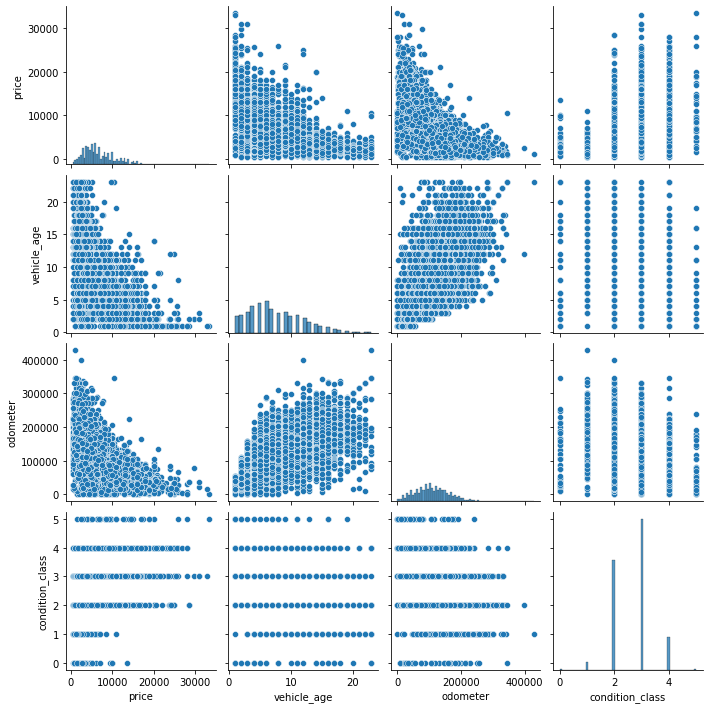

In [107]:
sns.pairplot(for_scatter_Sedan)

In [108]:
for_scatter_Sedan.corr()

,price,vehicle_age,odometer,condition_class
price,1.000000,-0.667718,-0.651820,0.332289
vehicle_age,-0.667718,1.000000,0.691848,-0.291122
odometer,-0.651820,0.691848,1.000000,-0.327500
condition_class,0.332289,-0.291122,-0.327500,1.000000


In [109]:
for_scatter_SUV.corr()

,price,vehicle_age,odometer,condition_class
price,1.000000,-0.642020,-0.636811,0.297328
vehicle_age,-0.642020,1.000000,0.709022,-0.307145
odometer,-0.636811,0.709022,1.000000,-0.335051
condition_class,0.297328,-0.307145,-0.335051,1.000000


**By comparison, we can see, that as for Sedan the _vehicle age_ factor impacts the price the most. Also, the odometer and condition_class factors show stronger correlation with Sedan type of vehicle rather than with SUV. We can make a conclusion, that price for Sedans is getting lower with time faster, than with SUVs. In other words, Sedans are losing value faster.**

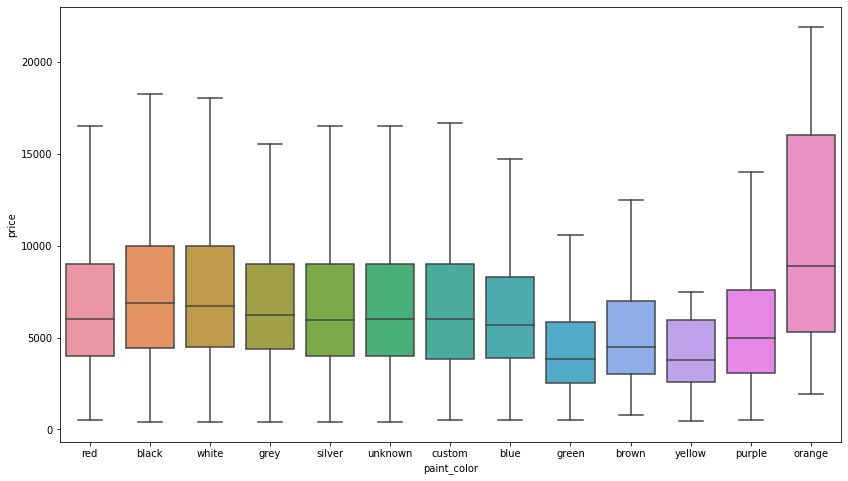

In [110]:
#Plotting a boxplot with the paint_color variable
plt.figure(figsize=(14,8))
ax=sns.boxplot(x="paint_color", y="price", data=Sedan,showfliers = False)

**Orange Sedans are among the most expensive, just like SUVs, that we analysed above.**

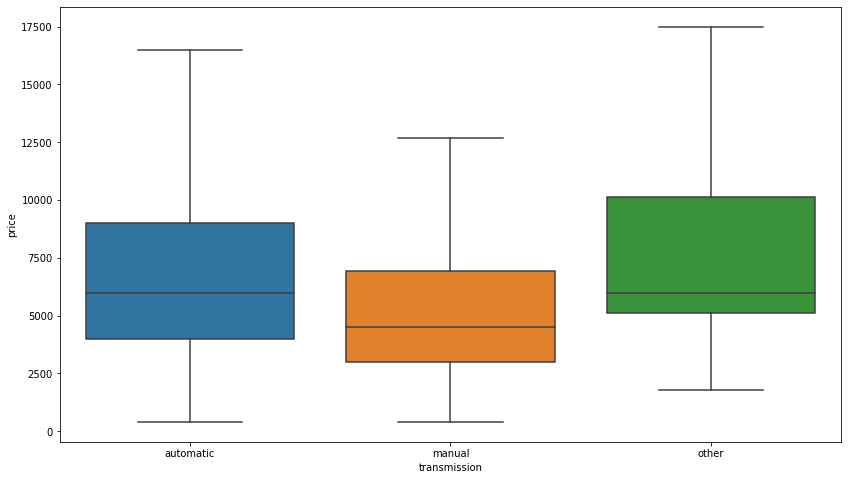

In [111]:
plt.figure(figsize=(14,8))
ax=sns.boxplot(x="transmission", y="price", data=Sedan, showfliers = False)

**With Sedans, on the other hand, the situation is quite different from what we saw with SUV's.<br> This time automatic transmission is more valuable than the manual one.**

THE ANALYSIS ON THE WHOLE DATASET WITHOUT OUTLIERS IS PROVIDED BELOW FOR REFERENCE

<AxesSubplot:xlabel='vehicle_age', ylabel='price'>

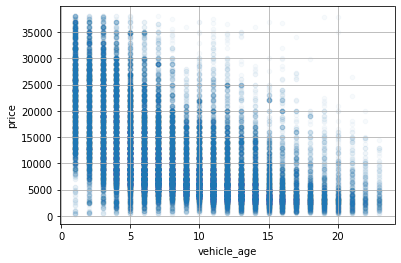

In [112]:
good_data.plot(x='vehicle_age', y='price', kind='scatter', grid=True, alpha=0.03)

In [113]:
display(good_data['price'].corr(good_data['vehicle_age']))


-0.5579345071894286

**The scatterplot along with Pearson correlation coefficient clearly indicate, that there is a negative correlation between price and vehicle_age. though it could be stronger. In other words, the older the vehicle the less it tends to cost.**

<AxesSubplot:xlabel='odometer', ylabel='price'>

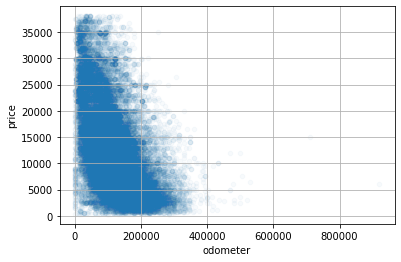

In [114]:
good_data.plot(x='odometer', y='price', kind='scatter', grid=True, alpha=0.03)

In [115]:
display(good_data['price'].corr(good_data['odometer']))


-0.5217477613629337

**The scatterplot and Pearson correlation coefficient above reveal, that there is a negative correlation between price and mileage.<br> In other words, the older the vehicle the less it tends to cost.**

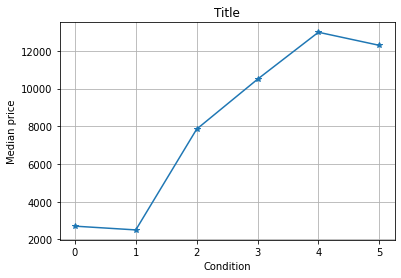

In [116]:
good_data.groupby('condition_class')['price'].median().plot(grid=True, marker='*')

plt.title('Title')
plt.xlabel('Condition')
plt.ylabel('Median price')

plt.show()

In [117]:
display(good_data['price'].corr(good_data['condition_class']))


0.22178409458546164

In [118]:
# The big picture on the whole dataset correlation
good_data_correlation = good_data[['price', 'vehicle_age', 'odometer', 'condition_class']]
good_data_correlation.corr()

,price,vehicle_age,odometer,condition_class
price,1.000000,-0.557935,-0.521748,0.221784
vehicle_age,-0.557935,1.000000,0.675205,-0.269695
odometer,-0.521748,0.675205,1.000000,-0.286165
condition_class,0.221784,-0.269695,-0.286165,1.000000


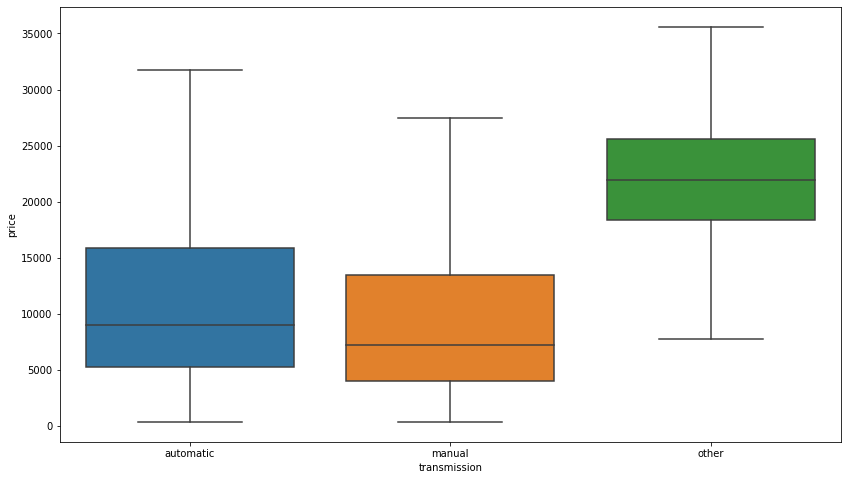

In [119]:
plt.figure(figsize=(14,8))
ax=sns.boxplot(x="transmission", y="price", data=good_data,showfliers = False)

**Judging by the whole data, it turns out, that other transmission types are more valued, probably, because those are extremely rare old retro cars**

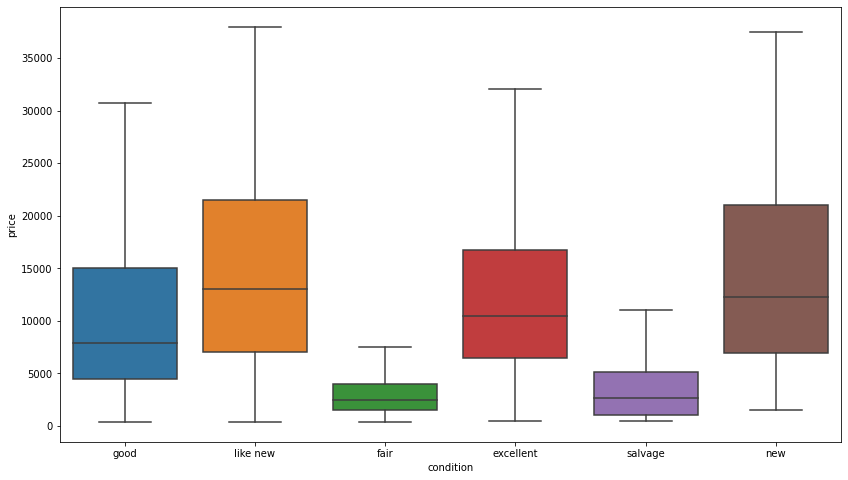

In [120]:
plt.figure(figsize=(14,8))
ax=sns.boxplot(x="condition", y="price", data=good_data,showfliers = False)

**The data from boxplot above aligns with logic and common sense: the better condition the more the car costs.**

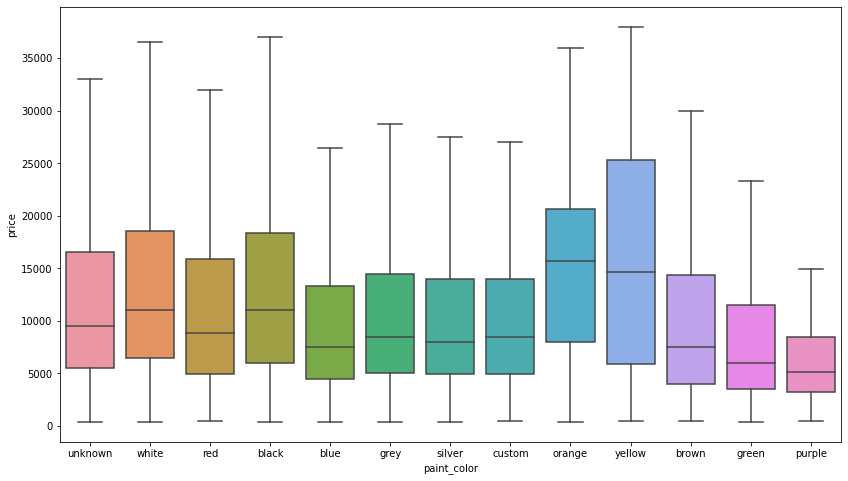

In [121]:
plt.figure(figsize=(14,8))
ax=sns.boxplot(x="paint_color", y="price", data=good_data,showfliers = False)

**Overall, the yellow color is the most valuable, which is not the case with SUV's and Sedans.**

## General conclusion

1. The DataFrame was cleaned of duplicates, missing values were filled appropriately, data types were fixed.
2. The data was enriched with the following columns [year_posted, month_posted, weekday_posted, vehicle_age,	avg_mileage_year] and replaced the condition values with a scale 0-5 using a dictionary and a lambda function to make further analysis easier.
3. Core parameters have been studied (Price, The vehicle's age when the ad was placed, Mileage, Number of cylinders, Condition), outline borders have been established, using the percentile method. This led to the conclusion, that the dataframe is flawed and contained lots of outliers.
4. A border list has been created and the data was cleaned of outliers, using query method outliers and stored in a separate DataFrame.
5. The core parameters have been studied and displayed on histogram comparing filtered data with unfiltered
6. Ads lifetime has been studied, revealing, that most of the cars are sold within a month. Those, that were not sold after 115 days look suspicious and unusual, therefore, were removed as outliers.
7. The average price per vehicle type was discovered and the two most frequent ads by vehicle type were selected, which turned out to be SUV and Sedan.
8. It was found out eventually, that vehicle_age is the most impactful factor on the price, followed by mileage. Another peculiar observation: orange color also impacted the price. 
9. It can also be inferred from the analysis, that Sedans are losing value faster with time, than SUVs.